In [33]:
import requests
from functions import *

In [99]:
team = "TH"
boo = get_puuid_by_riotid("TH benjyfishy", "epval", "esports")["puuid"]
boolist = get_matchlist_by_puuid(boo, "esports")["history"]
list_ids = boolist[12]

[{'victim': {'id': 'QNmZT58DJT98C_dNlGGC-XRPk5xDr6gWfY1aodLgbSDfKYzXRCrWdwjAi9Cg-Uh0EwPc2XNJbDa3dA', 'loc': {'x': 294, 'y': 1198}}, 'DlnroP--_ic_BS8JoH9FZTaOED0vFlAhB4J9t3yeI_gnVKJ-_GoQ0ORNFywQXdpjZ6xlZrON4J_Zdg': {'x': 757, 'y': 1157}, 'wTsidSB1YkISJOtbZkBeVeqLHzUkkjldYdVJU0ui8NDL_hzcZ08s5aCnzSNFpjGl5hAp-w7FngivJw': {'x': -1827, 'y': -1859}, 'tG4xWiSIjRXfUyu84WdD90StT_ZV01vWASUoZY9u-SDTjIkf8wDDFEmruv32HrkJqt8a_9APKbhHJg': {'x': -3420, 'y': 163}, 'twKorWagOelSK1y39hpnDEjEasM5y9LygBZsHB1S_NkGFYW7N6wbGcqbOmJcLZvGMUKl1Ry9sXhekA': {'x': -2506, 'y': -1358}, '-u-EcnkknL-ezsQYpk8P9BEfE0z_zEHWEjBk4owj-xku4TvwrtYGnSPvxClhh0QEdugkxawNVXKLXQ': {'x': 1720, 'y': 4435}, 'fIc6PvUmHsF2QJtlmjvgwNR5cTW8QIwl0wmzaTUc5PPSGB5cBC2pUFu1sE4BiyrsM7jaJ4Fk45BbnQ': {'x': -5100, 'y': -2332}, 'dLhzTn3QPMljJmT_5xbUZYgA0Qk9rxCU8b5ylgsiTnxWoWJirAVGXcg3wH3nwLMGv16epjOedkkXIA': {'x': -98, 'y': -1070}, 'YwQPYBRdEtg3awplLaFeAGh-fU7vXLgP37y8de1BszkxFbqQx85JSfynKFSboYJ3TQUpfBjEN7TjMg': {'x': -41, 'y': 1173}, '9NEMdIHG1BMR307

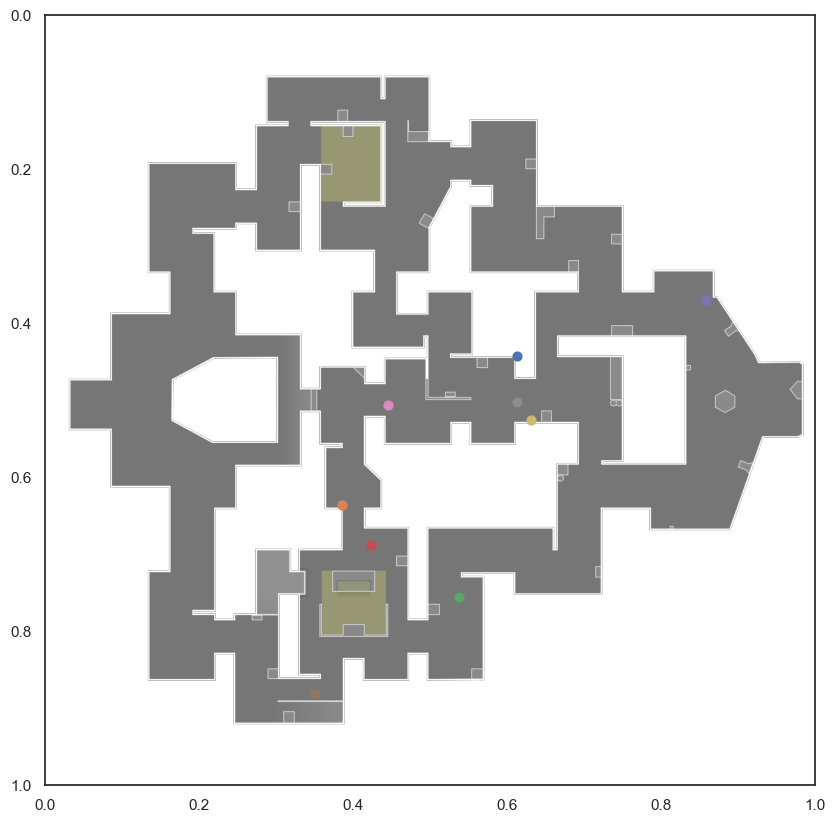

In [102]:
match = get_match_by_match_id(list_ids["matchId"], "esports")
map = get_map_by_id(match["matchInfo"]["mapId"])
params = {"bind": {
        "xMultiplier": 0.000059,
        "yMultiplier": -0.000059,
        "xScalarToAdd": 0.576941,
        "yScalarToAdd": 0.967566,
    }, "corrode":{
        "xMultiplier": 0.000075,
        "yMultiplier": -0.000075,
        "xScalarToAdd":0.526158,
        "yScalarToAdd":0.5
    }}
points = []
for round in match["roundResults"]:
    kills = []
    for player in round["playerStats"]:
        for kill in player["kills"]:
            kills.append((kill["timeSinceRoundStartMillis"], kill))
    kills.sort(key=lambda x: x[0])
    if kills[0][0] < 100000:
        kill_list = {}
        kill = kills[0][1]
        kill_list["victim"] = {"id": kill["victim"], "loc": kill["victimLocation"]}
        
        for pos in kill["playerLocations"]:
            kill_list[pos["puuid"]] = pos["location"]
        points.append(kill_list)
    print(points)
    break

sns.set_theme(style="white")
map_name = map.lower()
map_image_path = f"maps/{map_name}.png"
map_img = mpimg.imread(map_image_path)
if map_name in ["icebox", "sunset", "ascent", "pearl", "corrode", "bind"]:
    map_img = np.flipud(map_img)

ig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(map_img, extent=[0, 1, 0, 1], origin='upper')
for point in points:
    for player_id, loc in point.items():
        if player_id != "victim":  # Skip the victim marker
            if map_name in ["haven", "split", "lotus", "icebox", "sunset", "ascent", "pearl", "corrode", "bind"]:
                x, y = (loc["y"] * params[map_name]["xMultiplier"] + params[map_name]["xScalarToAdd"], loc["x"] * params[map_name]["yMultiplier"] + params[map_name]["yScalarToAdd"])
            else:
                x, y = (loc["x"] * params[map_name]["xMultiplier"] + params[map_name]["xScalarToAdd"], loc["y"] * params[map_name]["yMultiplier"] + params[map_name]["yScalarToAdd"])
            ax.scatter(x,y, alpha=1, s=40)

if map_name in ["haven", "split", "lotus", "icebox", "sunset", "ascent", "pearl", "corrode", "bind"]:
    ax.invert_yaxis()



In [80]:


last_match = get_match_by_match_id(list_ids[-1]["matchId"], "esports")
print(last_match["teams"])
map = last_match["matchInfo"]["mapId"]
map = get_map_by_id(map)
print(f"Map: {map}")
for p in last_match["players"]:
    if p["teamId"] in ["Blue", "Red"] and team not in p["gameName"]:
        team2 = p["gameName"].split(' ')[0]
        res1, res2 = last_match["teams"][0]["roundsWon"], last_match["teams"][1]["roundsWon"]
        print(f"{team} vs {team2} - Map: {map} - Result: {res1}:{res2}")
        break


[{'teamId': 'Red', 'won': False, 'roundsPlayed': 16, 'roundsWon': 3, 'numPoints': 3}, {'teamId': 'Blue', 'won': True, 'roundsPlayed': 16, 'roundsWon': 13, 'numPoints': 13}]
Map: Sunset
TH vs RRQ - Map: Sunset - Result: 3:13


In [43]:
player = get_riotid_by_puuid('9NEMdIHG1BMR307dHDARr9BIEZPhHj-MO8bPPfEDJJSXcvZmzaJcj7wzhzVpg7xDAONurTT3ccqWyw', "esports")
player

{'error': 'Account (9NEMdIHG1BMR307dHDARr9BIEZPhHj-MO8bPPfEDJJSXcvZmzaJcj7wzhzVpg7xDAONurTT3ccqWyw) not found',
 'status': 404}

In [42]:
match = get_match_by_match_id('732f8886-49f7-4638-9c9c-af198e3dd188', "esports")
match

{'matchInfo': {'matchId': '732f8886-49f7-4638-9c9c-af198e3dd188',
  'mapId': '/Game/Maps/Canyon/Canyon',
  'gameVersion': 'release-07.00-shipping-31-924172',
  'gameLengthMillis': 3623160,
  'region': 'tournament',
  'gameStartMillis': 1689778559120,
  'provisioningFlowId': 'CustomGame',
  'isCompleted': True,
  'customGameName': '',
  'queueId': '',
  'gameMode': '/Game/GameModes/Bomb/BombGameMode.BombGameMode_C',
  'isRanked': False,
  'seasonId': '3e47230a-463c-a301-eb7d-67bb60357d4f',
  'premierMatchInfo': {'premierSeasonId': None, 'premierEventId': None},
  'map': 'Fracture'},
 'players': [{'puuid': 'o72AmRwLKq0OTwNFTCFyQzP2uAs5HhsHojWcbfRdIPNmDe6sHqKS-hLXG1AVB105G2JYoBcz0yrfXg',
   'gameName': 'KOI Sheydos',
   'tagLine': 'eProd',
   'teamId': 'Blue',
   'partyId': '5e8a1291-6072-4c63-9342-0e6fc3bb43fb',
   'characterId': '5f8d3a7f-467b-97f3-062c-13acf203c006',
   'stats': {'score': 2457,
    'roundsPlayed': 21,
    'kills': 9,
    'deaths': 12,
    'assists': 12,
    'playtimeMi